In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/Survival_SupplementalTable_S1_20171025_xena_sp', sep='\t', index_col=0)
df.columns
df = df.rename(columns={'_PATIENT': 'bcr_patient_barcode'})

In [21]:
print(df.columns)

Index(['bcr_patient_barcode', 'cancer type abbreviation',
       'age_at_initial_pathologic_diagnosis', 'gender', 'race',
       'ajcc_pathologic_tumor_stage', 'clinical_stage', 'histological_type',
       'histological_grade', 'initial_pathologic_dx_year', 'menopause_status',
       'birth_days_to', 'vital_status', 'tumor_status', 'last_contact_days_to',
       'death_days_to', 'cause_of_death', 'new_tumor_event_type',
       'new_tumor_event_site', 'new_tumor_event_site_other',
       'new_tumor_event_dx_days_to', 'treatment_outcome_first_course',
       'margin_status', 'residual_tumor', 'OS', 'OS.time', 'DSS', 'DSS.time',
       'DFI', 'DFI.time', 'PFI', 'PFI.time', 'Redaction'],
      dtype='object')


In [23]:
print(df['new_tumor_event_type'].value_counts())

Distant Metastasis                                                                                                                                                                               779
Locoregional Recurrence                                                                                                                                                                          540
Recurrence                                                                                                                                                                                       420
Progression of Disease                                                                                                                                                                           303
New Primary Tumor                                                                                                                                                                                160
Intrahepatic Re

In [3]:
df

,bcr_patient_barcode,cancer type abbreviation,age_at_initial_pathologic_diagnosis,gender,race,ajcc_pathologic_tumor_stage,clinical_stage,histological_type,histological_grade,initial_pathologic_dx_year,...,residual_tumor,OS,OS.time,DSS,DSS.time,DFI,DFI.time,PFI,PFI.time,Redaction
sample,,,,,,,,,,,,,,,,,,,,,
TCGA-OR-A5J1-01,TCGA-OR-A5J1,ACC,58.0,MALE,WHITE,Stage II,NaN,Adrenocortical carcinoma- Usual Type,NaN,2000.0,...,NaN,1.0,1355.0,1.0,1355.0,1.0,754.0,1.0,754.0,NaN
TCGA-OR-A5J2-01,TCGA-OR-A5J2,ACC,44.0,FEMALE,WHITE,Stage IV,NaN,Adrenocortical carcinoma- Usual Type,NaN,2004.0,...,NaN,1.0,1677.0,1.0,1677.0,NaN,NaN,1.0,289.0,NaN
TCGA-OR-A5J3-01,TCGA-OR-A5J3,ACC,23.0,FEMALE,WHITE,Stage III,NaN,Adrenocortical carcinoma- Usual Type,NaN,2008.0,...,NaN,0.0,2091.0,0.0,2091.0,1.0,53.0,1.0,53.0,NaN
TCGA-OR-A5J4-01,TCGA-OR-A5J4,ACC,23.0,FEMALE,WHITE,Stage IV,NaN,Adrenocortical carcinoma- Usual Type,NaN,2000.0,...,NaN,1.0,423.0,1.0,423.0,NaN,NaN,1.0,126.0,NaN
TCGA-OR-A5J5-01,TCGA-OR-A5J5,ACC,30.0,MALE,WHITE,Stage III,NaN,Adrenocortical carcinoma- Usual Type,NaN,2000.0,...,NaN,1.0,365.0,1.0,365.0,NaN,NaN,1.0,50.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-YZ-A980-01,TCGA-YZ-A980,UVM,75.0,MALE,WHITE,Stage IIIA,Stage IIIA,Spindle Cell|Epithelioid Cell,NaN,2010.0,...,NaN,0.0,1862.0,0.0,1862.0,NaN,NaN,1.0,1556.0,NaN
TCGA-YZ-A982-01,TCGA-YZ-A982,UVM,79.0,FEMALE,WHITE,Stage IIIB,Stage IIIB,Spindle Cell,NaN,2013.0,...,NaN,0.0,495.0,0.0,495.0,NaN,NaN,0.0,495.0,NaN
TCGA-YZ-A983-01,TCGA-YZ-A983,UVM,51.0,FEMALE,WHITE,Stage IIB,Stage IIB,Epithelioid Cell,NaN,2013.0,...,NaN,0.0,798.0,0.0,798.0,NaN,NaN,0.0,798.0,NaN


# Summary Statistics

In [4]:
summary_table = pd.DataFrame(columns=['Cancer Type', 'No. of Cases', 'Age (Mean ± SD)', 'Gender M/F', 'Race White/Black/Other/NA', 'Stage 0/I/II/III/IV/NA', 'Grade 1/2/3/4/NA'])

# Group by Cancer Type
grouped = df.groupby('cancer type abbreviation')


for cancer_type, group in grouped:
    summary_table = summary_table.append({
        'Cancer Type': cancer_type,
        'No. of Cases': len(group),
        'Age (Mean ± SD)': f"{group['age_at_initial_pathologic_diagnosis'].mean():.2f} ± {group['age_at_initial_pathologic_diagnosis'].std():.2f}",
        'Gender M/F': '/'.join([f"{gender} {len(subgroup)}" for gender, subgroup in group.groupby('gender')]),
        'Race White/Black/Other/NA': '/'.join([f"{race} {len(subgroup)}" for race, subgroup in group.groupby('race')]),
        'Stage 0/I/II/III/IV/NA': '/'.join([f"Stage {stage} {len(subgroup)}" for stage, subgroup in group.groupby('ajcc_pathologic_tumor_stage')]),
        'Grade 1/2/3/4/NA': '/'.join([f"Grade {grade} {len(subgroup)}" for grade, subgroup in group.groupby('histological_grade')])
    }, ignore_index=True)


print(summary_table)

   Cancer Type No. of Cases Age (Mean ± SD)           Gender M/F  \
0          ACC           92   47.16 ± 16.30    FEMALE 60/MALE 32   
1         BLCA          436   68.14 ± 10.62  FEMALE 119/MALE 317   
2         BRCA         1236   58.19 ± 13.40  FEMALE 1223/MALE 13   
3         CESC          312   48.27 ± 13.76           FEMALE 312   
4         CHOL           45   64.56 ± 12.46    FEMALE 23/MALE 22   
5         COAD          545   67.42 ± 13.07  FEMALE 261/MALE 284   
6         DLBC           48   56.27 ± 13.95    FEMALE 26/MALE 22   
7         ESCA          204   62.99 ± 11.92   FEMALE 33/MALE 171   
8          GBM          602   57.65 ± 14.40  FEMALE 234/MALE 368   
9         HNSC          604   61.00 ± 11.92  FEMALE 164/MALE 440   
10        KICH           91   52.22 ± 14.13    FEMALE 39/MALE 52   
11        KIRC          944   60.84 ± 12.07  FEMALE 327/MALE 617   
12        KIRP          352   61.77 ± 12.15   FEMALE 95/MALE 257   
13        LAML          200   55.03 ± 16.07   FE

/var/folders/hf/qvknh29s1c74d6wxf9syrl3r0000gn/T/ipykernel_45989/2332497458.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_table = summary_table.append({
/var/folders/hf/qvknh29s1c74d6wxf9syrl3r0000gn/T/ipykernel_45989/2332497458.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_table = summary_table.append({
/var/folders/hf/qvknh29s1c74d6wxf9syrl3r0000gn/T/ipykernel_45989/2332497458.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_table = summary_table.append({
/var/folders/hf/qvknh29s1c74d6wxf9syrl3r0000gn/T/ipykernel_45989/2332497458.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_table =

In [5]:
summary_table.to_csv("../data/Summary.txt",index=False)

In [6]:
summary_table

,Cancer Type,No. of Cases,Age (Mean ± SD),Gender M/F,Race White/Black/Other/NA,Stage 0/I/II/III/IV/NA,Grade 1/2/3/4/NA
0,ACC,92,47.16 ± 16.30,FEMALE 60/MALE 32,ASIAN 2/BLACK OR AFRICAN AMERICAN 1/WHITE 78/[...,Stage Stage I 9/Stage Stage II 44/Stage Stage ...,
1,BLCA,436,68.14 ± 10.62,FEMALE 119/MALE 317,ASIAN 44/BLACK OR AFRICAN AMERICAN 25/WHITE 34...,Stage Stage I 2/Stage Stage II 136/Stage Stage...,Grade High Grade 412/Grade Low Grade 21/Grade ...
2,BRCA,1236,58.19 ± 13.40,FEMALE 1223/MALE 13,AMERICAN INDIAN OR ALASKA NATIVE 1/ASIAN 62/BL...,Stage Stage I 111/Stage Stage IA 90/Stage Stag...,
3,CESC,312,48.27 ± 13.76,FEMALE 312,AMERICAN INDIAN OR ALASKA NATIVE 8/ASIAN 20/BL...,,Grade G1 20/Grade G2 137/Grade G3 122/Grade G4...
4,CHOL,45,64.56 ± 12.46,FEMALE 23/MALE 22,ASIAN 3/BLACK OR AFRICAN AMERICAN 2/WHITE 40,Stage Stage I 26/Stage Stage II 10/Stage Stage...,Grade G1 1/Grade G2 18/Grade G3 23/Grade G4 3
5,COAD,545,67.42 ± 13.07,FEMALE 261/MALE 284,AMERICAN INDIAN OR ALASKA NATIVE 2/ASIAN 11/BL...,Stage Stage I 85/Stage Stage IA 1/Stage Stage ...,
6,DLBC,48,56.27 ± 13.95,FEMALE 26/MALE 22,ASIAN 18/BLACK OR AFRICAN AMERICAN 1/WHITE 29,,
7,ESCA,204,62.99 ± 11.92,FEMALE 33/MALE 171,ASIAN 46/BLACK OR AFRICAN AMERICAN 6/WHITE 132...,Stage Stage I 11/Stage Stage IA 9/Stage Stage ...,Grade G1 20/Grade G2 85/Grade G3 51/Grade GX 48
8,GBM,602,57.65 ± 14.40,FEMALE 234/MALE 368,ASIAN 13/BLACK OR AFRICAN AMERICAN 52/WHITE 512,,
9,HNSC,604,61.00 ± 11.92,FEMALE 164/MALE 440,AMERICAN INDIAN OR ALASKA NATIVE 2/ASIAN 12/BL...,Stage Stage I 29/Stage Stage II 92/Stage Stage...,Grade G1 75/Grade G2 348/Grade G3 148/Grade G4...


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


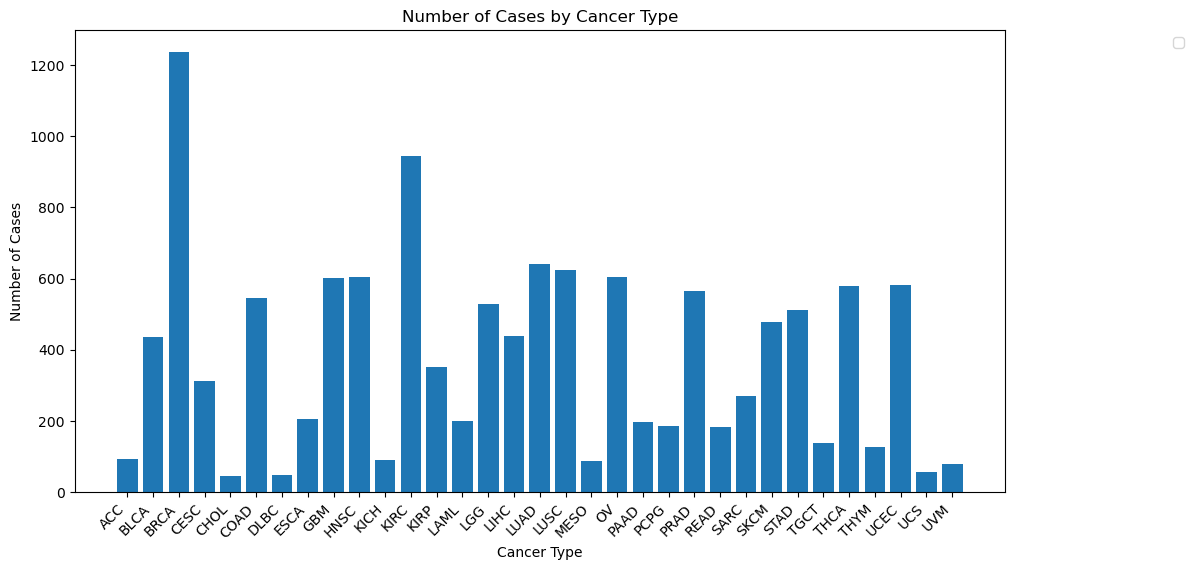

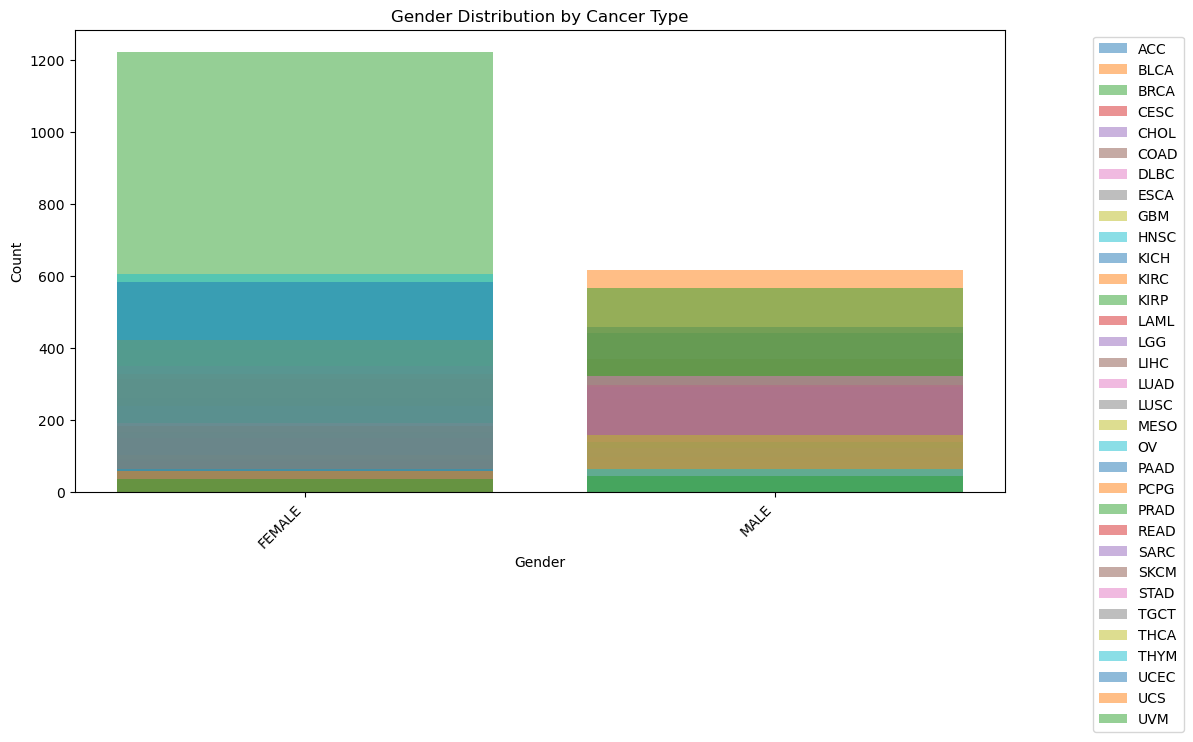

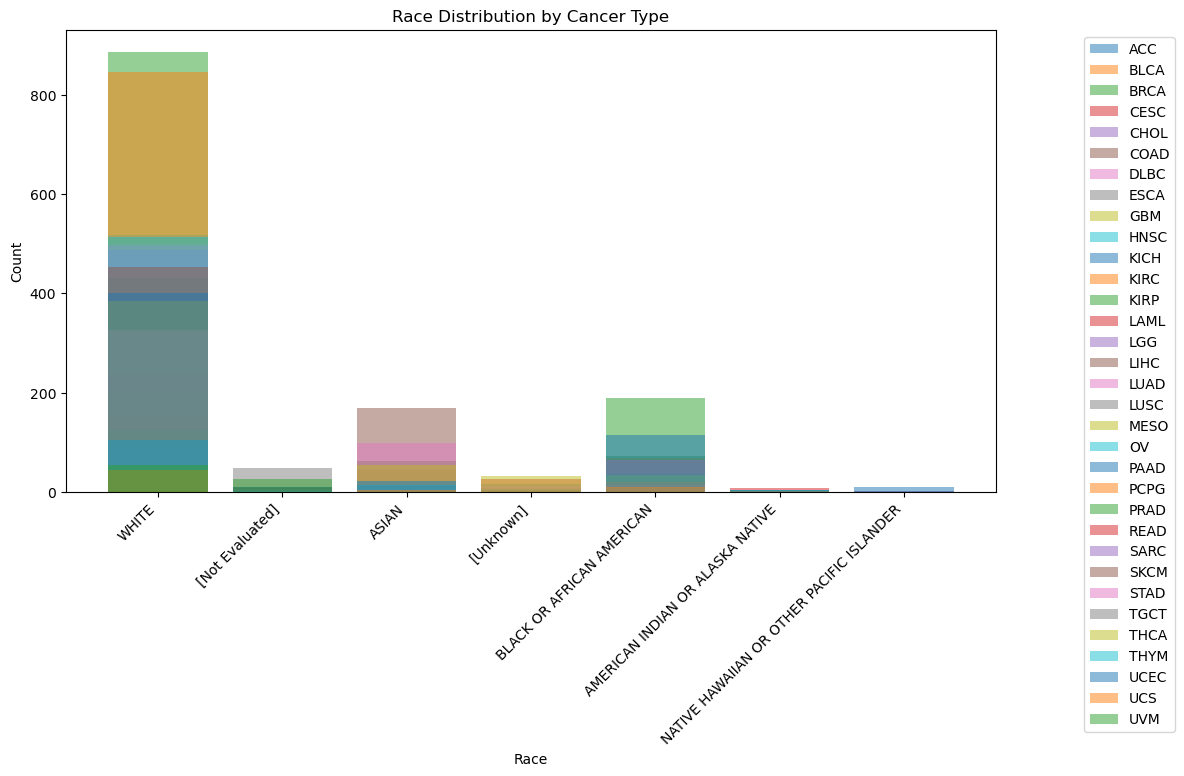

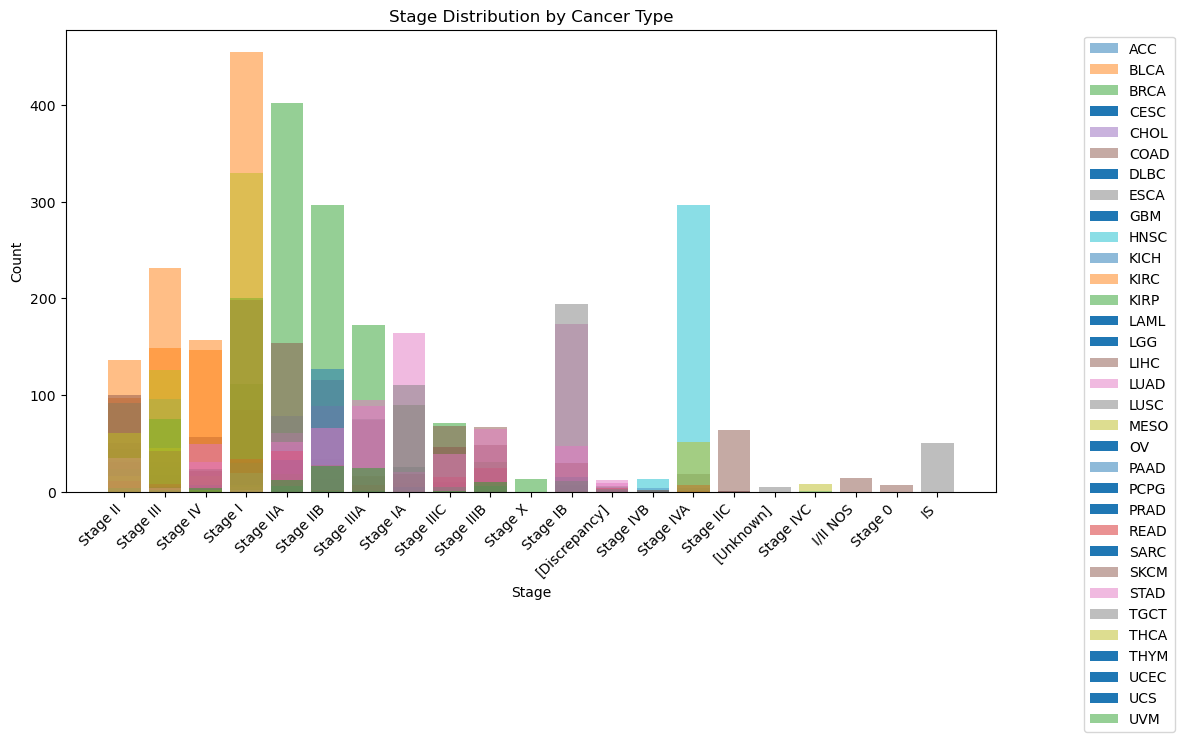

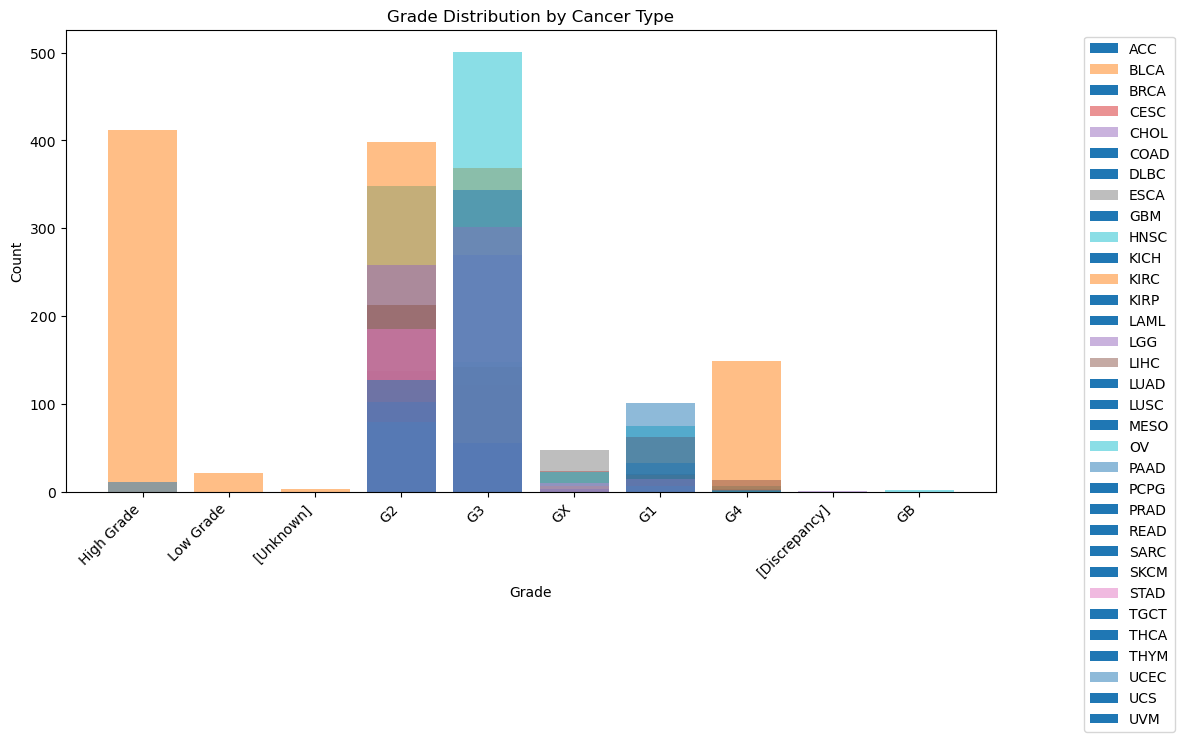

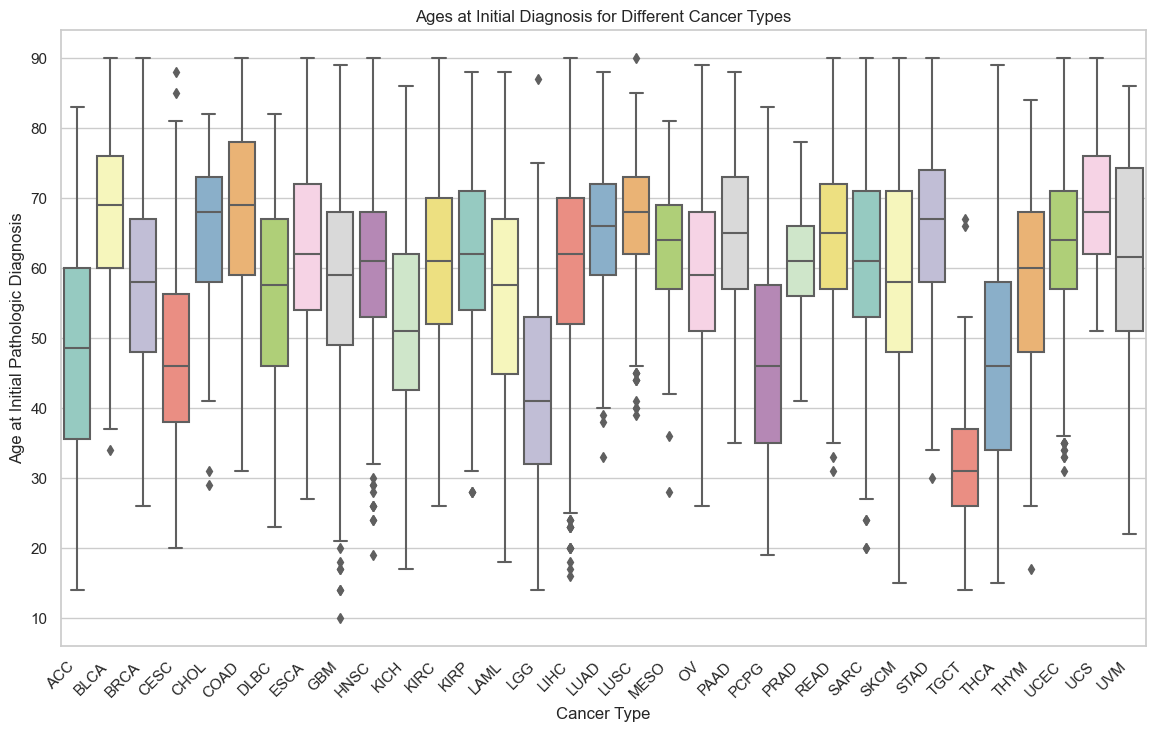

In [7]:



plt.figure(figsize=(12, 6))
plt.bar(summary_table['Cancer Type'], summary_table['No. of Cases'])
plt.title('Number of Cases by Cancer Type')
plt.xlabel('Cancer Type')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()


plt.figure(figsize=(12, 6))
for _, row in summary_table.iterrows():
    gender_data = df[df['cancer type abbreviation'] == row['Cancer Type']]['gender']
    gender_counts = gender_data.value_counts()
    plt.bar(gender_counts.index, gender_counts.values, label=row['Cancer Type'], alpha=0.5)

plt.title('Gender Distribution by Cancer Type')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()


plt.figure(figsize=(12, 6))
for _, row in summary_table.iterrows():
    race_data = df[df['cancer type abbreviation'] == row['Cancer Type']]['race']
    race_counts = race_data.value_counts()
    plt.bar(race_counts.index, race_counts.values, label=row['Cancer Type'], alpha=0.5)

plt.title('Race Distribution by Cancer Type')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()


plt.figure(figsize=(12, 6))
for _, row in summary_table.iterrows():
    stage_data = df[df['cancer type abbreviation'] == row['Cancer Type']]['ajcc_pathologic_tumor_stage']
    stage_counts = stage_data.value_counts()
    plt.bar(stage_counts.index, stage_counts.values, label=row['Cancer Type'], alpha=0.5)

plt.title('Stage Distribution by Cancer Type')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()


plt.figure(figsize=(12, 6))
for _, row in summary_table.iterrows():
    grade_data = df[df['cancer type abbreviation'] == row['Cancer Type']]['histological_grade']
    grade_counts = grade_data.value_counts()
    plt.bar(grade_counts.index, grade_counts.values, label=row['Cancer Type'], alpha=0.5)

plt.title('Grade Distribution by Cancer Type')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


plt.figure(figsize=(14, 8))
sns.boxplot(x='cancer type abbreviation', y='age_at_initial_pathologic_diagnosis', data=df, palette='Set3')
plt.title('Ages at Initial Diagnosis for Different Cancer Types')
plt.xlabel('Cancer Type')
plt.ylabel('Age at Initial Pathologic Diagnosis')
plt.xticks(rotation=45, ha='right')
plt.show()


# Pathway Analysis


In [8]:
df2= pd.read_table("../data/ssGSEA_1387GeneSets.txt",sep="\t")
df2

/var/folders/hf/qvknh29s1c74d6wxf9syrl3r0000gn/T/ipykernel_45989/918864000.py:1: DtypeWarning: Columns (1419) have mixed types. Specify dtype option on import or set low_memory=False.
  df2= pd.read_table("../data/ssGSEA_1387GeneSets.txt",sep="\t")


,bcr_patient_barcode,G2_Phase,Processive_synthesis_on_the_lagging_strand,Removal_of_the_Flap_Intermediate,Ubiquitin-dependent_degradation_of_Cyclin_D1,Establishment_of_Sister_Chromatid_Cohesion,Association_of_licensing_factors_with_the_pre-replicative_complex,Removal_of_licensing_factors_from_origins,extrinsic_prothrombin_activation_pathway,IL23-mediated_signaling_events,...,residual_tumor,OS,OS.time,DSS,DSS.time,DFI,DFI.time,PFI,PFI.time,Redaction
0,TCGA-06-2557,0.372338,0.124245,0.088940,-0.095243,0.044233,0.115419,0.131550,-0.014614,0.001196,...,NaN,1.0,33.0,1.0,33.0,NaN,NaN,1.0,33.0,NaN
1,TCGA-85-8287,0.402552,0.040920,-0.006645,-0.235600,-0.017269,0.050373,0.146710,-0.116735,0.291995,...,NaN,1.0,23.0,0.0,23.0,0.0,23.0,0.0,23.0,NaN
2,TCGA-DH-A7UV,-0.311087,-0.154113,-0.121560,-0.161664,-0.021204,-0.045176,-0.110305,-0.036295,-0.074558,...,NaN,0.0,566.0,0.0,566.0,NaN,NaN,0.0,566.0,NaN
3,TCGA-YG-AA3O,0.492422,0.258982,0.229723,0.079468,-0.069936,0.240615,0.282451,-0.028899,-0.042140,...,NaN,1.0,1154.0,1.0,1154.0,NaN,NaN,1.0,999.0,NaN
4,TCGA-EE-A29Q,0.389018,0.091680,0.130324,0.121917,0.125126,0.153116,0.166956,0.042734,-0.103486,...,NaN,1.0,2030.0,1.0,2030.0,NaN,NaN,1.0,1256.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9746,TCGA-AJ-A3NE,0.480330,0.191549,0.180182,0.121676,0.154302,0.168981,0.274483,0.013686,0.258744,...,NaN,0.0,628.0,0.0,628.0,0.0,628.0,0.0,628.0,NaN
9747,TCGA-C8-A12N,-0.059841,-0.092857,-0.059547,0.092712,-0.023714,-0.089450,-0.218099,-0.063248,-0.085695,...,NaN,0.0,358.0,0.0,358.0,0.0,358.0,0.0,358.0,NaN
9748,TCGA-DU-7302,-0.053613,-0.129411,-0.117446,-0.120983,0.067164,-0.046738,-0.096912,0.036876,-0.040280,...,NaN,0.0,1834.0,0.0,1834.0,NaN,NaN,1.0,1374.0,NaN
9749,TCGA-44-7669,0.484505,0.188122,0.159373,-0.043268,0.059275,0.112163,0.203689,0.114213,0.236461,...,NaN,1.0,574.0,1.0,574.0,1.0,390.0,1.0,390.0,NaN


In [9]:
"""df2= df2.T
df2= df2.reset_index()
df2.columns = df2.iloc[0]
df2 = df2[1:]
df2"""

'df2= df2.T\ndf2= df2.reset_index()\ndf2.columns = df2.iloc[0]\ndf2 = df2[1:]\ndf2'

In [10]:
#df2.rename(columns={'Gene_sets': 'bcr_patient_barcode'}, inplace=True)
#df2

In [11]:
#df2['bcr_patient_barcode'] = df2['bcr_patient_barcode'].apply(lambda x: x.rsplit('-', 1)[0])
#df2

In [30]:
df3 = pd.merge(df2,df, on="bcr_patient_barcode")
df3.rename(columns={'race_y': 'race'}, inplace=True)

In [45]:
df3.to_csv("../data/df3.txt",sep="\t", index= False)

# Survival analysis using K-M estimate

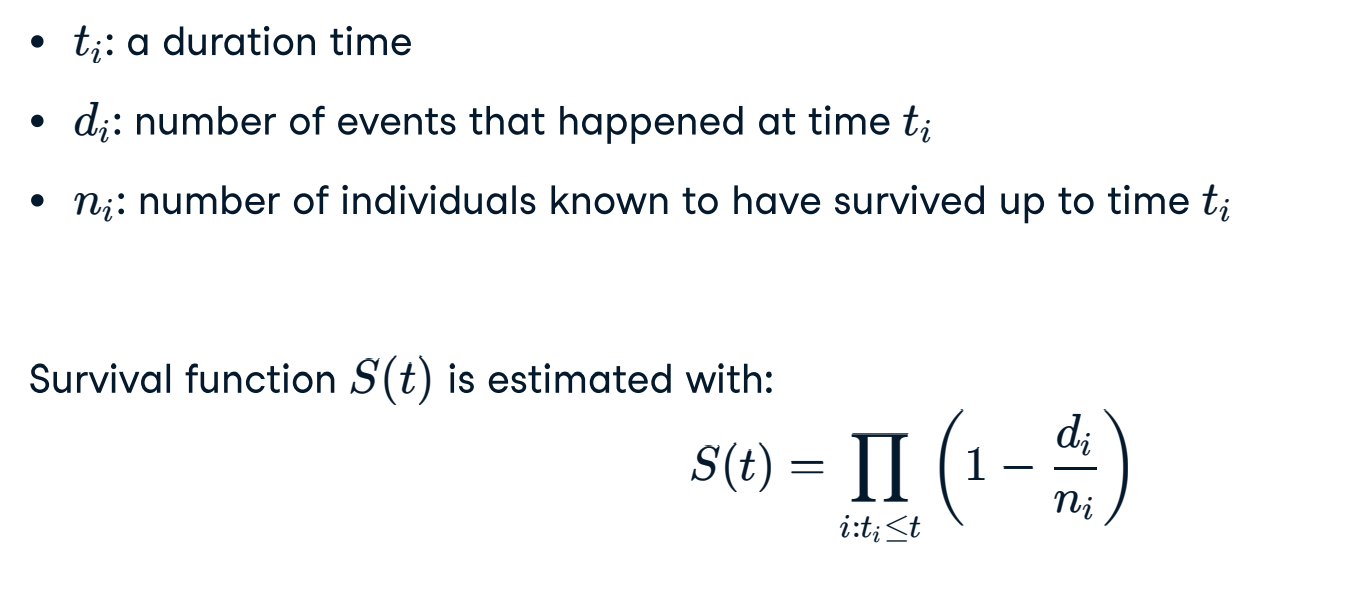

/var/folders/hf/qvknh29s1c74d6wxf9syrl3r0000gn/T/ipykernel_45989/176819406.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brca_data.rename(columns={'OS_y': 'OS', 'OS.time_y': 'OS.time'}, inplace=True)


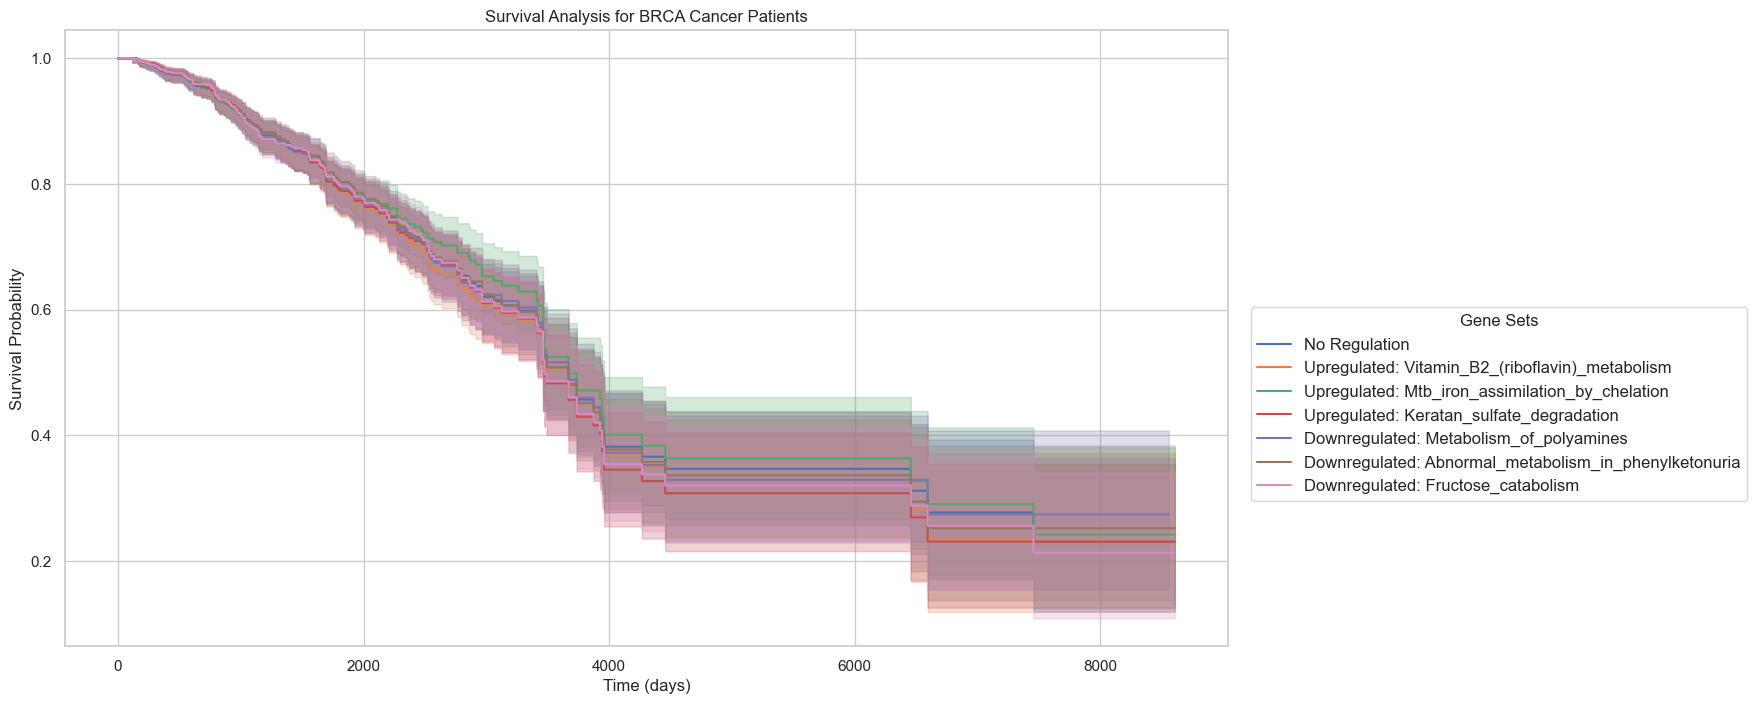

The pathway with the worst outcome on survival at the median time is: Upregulated: Mtb_iron_assimilation_by_chelation and cumulative hazard is: 0.07730850398703759


In [89]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt


gene_set_columns = df3.columns[1:1388]


brca_data = df3[df3['cancer type abbreviation'] == 'BRCA']

#rename columns OS_y to OS and OS.time_y to OS.time
brca_data.rename(columns={'OS_y': 'OS', 'OS.time_y': 'OS.time'}, inplace=True)

survival_columns = ['bcr_patient_barcode', 'OS', 'OS.time']


survival_data = brca_data[survival_columns]

survival_data = survival_data.dropna(subset=['OS', 'OS.time'])


gene_set_data = brca_data[gene_set_columns]


survival_data = pd.concat([survival_data.reset_index(drop=True), gene_set_data.reset_index(drop=True)], axis=1)
survival_data= survival_data.dropna()


num_gene_sets = 3

# Find the top 3 upregulated and downregulated gene sets
mean_expression = gene_set_data.mean()
top_upregulated_gene_sets = mean_expression.nlargest(num_gene_sets).index
top_downregulated_gene_sets = mean_expression.nsmallest(num_gene_sets).index

fig, ax = plt.subplots(figsize=(15, 8))


kmf = KaplanMeierFitter()

# Group 1: Not upregulated or downregulated
kmf.fit(durations=survival_data['OS.time'], event_observed=survival_data['OS'], label='No Regulation')
kmf.plot(ax=ax)

# Group 2: Upregulated gene sets
for gene_set in top_upregulated_gene_sets:
    mask = survival_data[gene_set] > 0
    kmf.fit(durations=survival_data.loc[mask, 'OS.time'], event_observed=survival_data.loc[mask, 'OS'], label=f'Upregulated: {gene_set}')
    kmf.plot(ax=ax)

# Group 3: Downregulated gene sets
for gene_set in top_downregulated_gene_sets:
    mask = survival_data[gene_set] < 0
    kmf.fit(durations=survival_data.loc[mask, 'OS.time'], event_observed=survival_data.loc[mask, 'OS'], label=f'Downregulated: {gene_set}')
    kmf.plot(ax=ax)


ax.set_title('Survival Analysis for BRCA Cancer Patients')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Survival Probability')


ax.legend(title="Gene Sets", bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0, fontsize='medium', ncol=1)

plt.show()

# Calculate cumulative hazard at a specific time point (e.g., at the median survival time)
median_survival_time = survival_data['OS.time'].median()

cumulative_hazard_at_median_time = {}

# Group 1: No Regulation
cumulative_hazard_at_median_time['No Regulation'] = 1.0 - kmf.survival_function_.loc[kmf.survival_function_.index.to_series().sub(median_survival_time).abs().idxmin()].iloc[0]

# Group 2: Upregulated gene sets
for gene_set in top_upregulated_gene_sets:
    mask = survival_data[gene_set] > 0
    kmf.fit(durations=survival_data.loc[mask, 'OS.time'], event_observed=survival_data.loc[mask, 'OS'])
    closest_time_point = kmf.survival_function_.index.to_series().sub(median_survival_time).abs().idxmin()
    cumulative_hazard_at_median_time[f'Upregulated: {gene_set}'] = 1.0 - kmf.survival_function_.loc[closest_time_point].iloc[0]

# Group 3: Downregulated gene sets
for gene_set in top_downregulated_gene_sets:
    mask = survival_data[gene_set] < 0
    kmf.fit(durations=survival_data.loc[mask, 'OS.time'], event_observed=survival_data.loc[mask, 'OS'])
    closest_time_point = kmf.survival_function_.index.to_series().sub(median_survival_time).abs().idxmin()
    cumulative_hazard_at_median_time[f'Downregulated: {gene_set}'] = 1.0 - kmf.survival_function_.loc[closest_time_point].iloc[0]

# Find the pathway with the highest cumulative hazard at the median survival time
worst_outcome_pathway = max(cumulative_hazard_at_median_time, key=cumulative_hazard_at_median_time.get)
max_cumulative_hazard = cumulative_hazard_at_median_time[worst_outcome_pathway]

print(f"The pathway with the worst outcome on survival at the median time is: {worst_outcome_pathway} and cumulative hazard is: {max_cumulative_hazard}")





ValueError: could not convert string to float: 'TCGA-C8-A133'

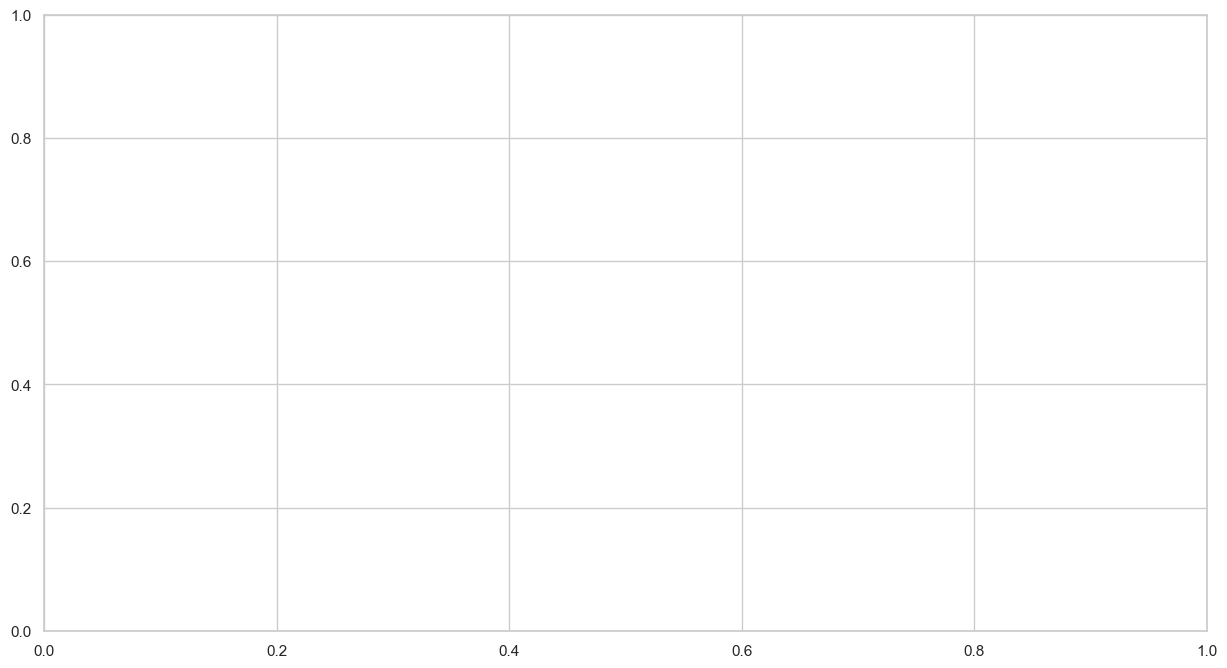

In [33]:
from lifelines import CoxPHFitter

fig, ax = plt.subplots(figsize=(15, 8))

cph = CoxPHFitter()

survival_columns = ['OS', 'OS.time', 'race']

survival_data = brca_data[survival_columns]

#convert the race column to numeric in brca_data



survival_data = survival_data.dropna(subset=['OS', 'OS.time', 'race'])

survival_data = pd.concat([survival_data.reset_index(drop=True), gene_set_data.reset_index(drop=True)], axis=1)
survival_data= survival_data.dropna()

cph.fit(survival_data, duration_col='OS.time', event_col='OS' )

cph.print_summary()



In [50]:
#drop the data of races that are below 40
race_counts = brca_data['race'].value_counts()
filtered_brca_data = brca_data.groupby('race').filter(lambda x: len(x) >= 40)

#now substitute each different race with a numeric value and store the mapping in a dictionary
races_accounted = filtered_brca_data['race'].unique()
race_num_map = {races_accounted[i] : i for i in range(len(races_accounted))}

#effect the mapping in the dataframe filtered_brca_data
filtered_brca_data['race'] = filtered_brca_data['race'].replace(race_num_map)
filtered_brca_data

#now we can use the CoxPHFitter
cph = CoxPHFitter()

survival_columns = ['OS', 'OS.time', 'race']

survival_data = filtered_brca_data[survival_columns]

cph.fit(survival_data, duration_col='OS.time', event_col='OS' )

cph.print_summary()


<lifelines.CoxPHFitter: fitted with 1110 total observations, 920 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 1110
number of events observed = 190
   partial log-likelihood = -1086.12
         time fit was run = 2023-11-22 11:15:43 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
race       -0.04       0.96       0.10            -0.24             0.15                 0.79                 1.16

            cmp to     z    p   -log2(p)
covariate                               
race          0.00 -0.43 0.67       0.59
---
Concordance = 0.50
Partial AIC = 2174.25
log-likelihood ratio test = 0.19 on 1 df
-log2(p) of ll-ratio test = 0.59

In [86]:
race_dfs = {}
races = brca_data['race'].unique()

for i, race in enumerate(races):
    if len(brca_data[brca_data['race'] == race]) < 40:
        continue
    race_dfs[race] = brca_data[brca_data['race'] == race].copy().replace({race:i})

df_combined = pd.concat([race_dfs[dfi] for dfi in race_dfs])

In [81]:
#search for age in the columns of df_combined
print([column for column in df_combined.columns if column.startswith('ag')])


['agrin_in_postsynaptic_differentiation', 'age_at_initial_pathologic_diagnosis_x', 'age_at_initial_pathologic_diagnosis_y']


In [87]:
cph = CoxPHFitter()

survival_columns = ['OS', 'OS.time', 'race']

survival_data = df_combined[survival_columns]

cph.fit(survival_data, duration_col='OS.time', event_col='OS' )

cph.print_summary()

<lifelines.CoxPHFitter: fitted with 1110 total observations, 920 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 1110
number of events observed = 190
   partial log-likelihood = -1086.12
         time fit was run = 2023-11-22 16:33:42 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
race       -0.04       0.96       0.10            -0.24             0.15                 0.79                 1.16

            cmp to     z    p   -log2(p)
covariate                               
race          0.00 -0.43 0.67       0.59
---
Concordance = 0.50
Partial AIC = 2174.25
log-likelihood ratio test = 0.19 on 1 df
-log2(p) of ll-ratio test = 0.59

<Axes: >

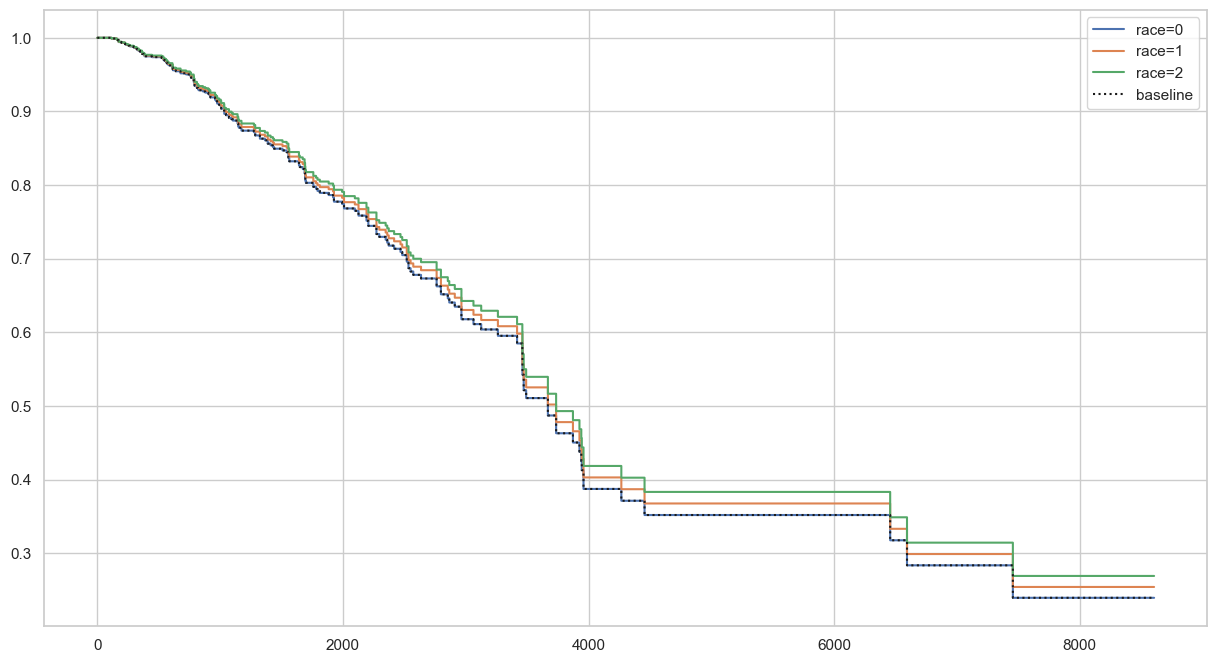

In [88]:
fig, ax = plt.subplots(figsize=(15, 8))
cph.plot_covariate_groups('race', [0, 1, 2], ax=ax)


In [82]:
#replace the column name 'age_at_initial_pathologic_diagnosis_x' of df_combined with 'age'
df_combined.rename(columns={'age_at_initial_pathologic_diagnosis_x': 'age'}, inplace=True)

/var/folders/hf/qvknh29s1c74d6wxf9syrl3r0000gn/T/ipykernel_45989/4159176556.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brca_data.rename(columns={'OS_y': 'OS', 'OS.time_y': 'OS.time'}, inplace=True)


<lifelines.CoxPHFitter: fitted with 1200 total observations, 1003 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 1200
number of events observed = 197
   partial log-likelihood = -1132.87
         time fit was run = 2023-11-22 17:27:06 UTC

---
                                     coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                  
Vitamin_B2_(riboflavin)_metabolism   0.58       1.78       0.38            -0.17             1.33                 0.84                 3.79

                                     cmp to    z    p   -log2(p)
covariate                                                       
Vitamin_B2_(riboflavin)_metabolism     0.00 1.51 0.13       2.92
---
Concordance = 0.55
Partial AIC = 2267.75
log-likelihood ratio test = 2.55 on 1 df
-log2(p) of ll-ratio test = 3.18

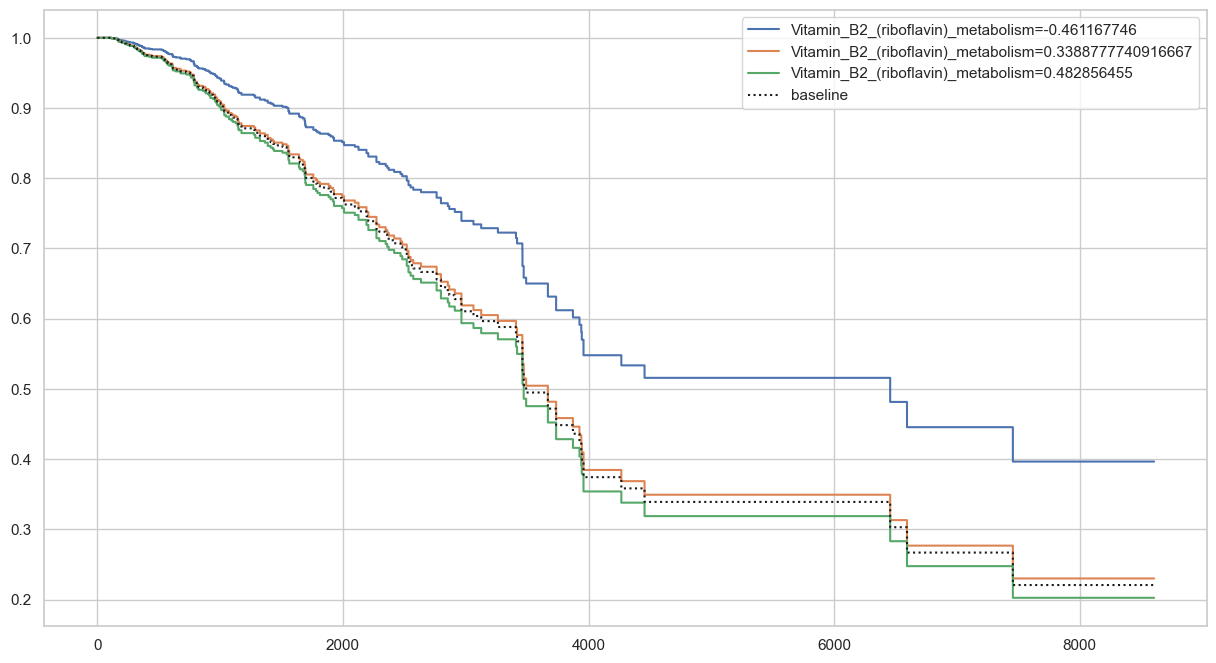

<lifelines.CoxPHFitter: fitted with 1200 total observations, 1003 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 1200
number of events observed = 197
   partial log-likelihood = -1131.48
         time fit was run = 2023-11-22 17:27:06 UTC

---
                                     coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                  
Mtb_iron_assimilation_by_chelation  -0.65       0.52       0.27            -1.18            -0.13                 0.31                 0.88

                                     cmp to     z    p   -log2(p)
covariate                                                        
Mtb_iron_assimilation_by_chelation     0.00 -2.44 0.01       6.11
---
Concordance = 0.53
Partial AIC = 2264.96
log-likelihood ratio test = 5.34 on 1 df
-log2(p) of ll-ratio test = 5.58

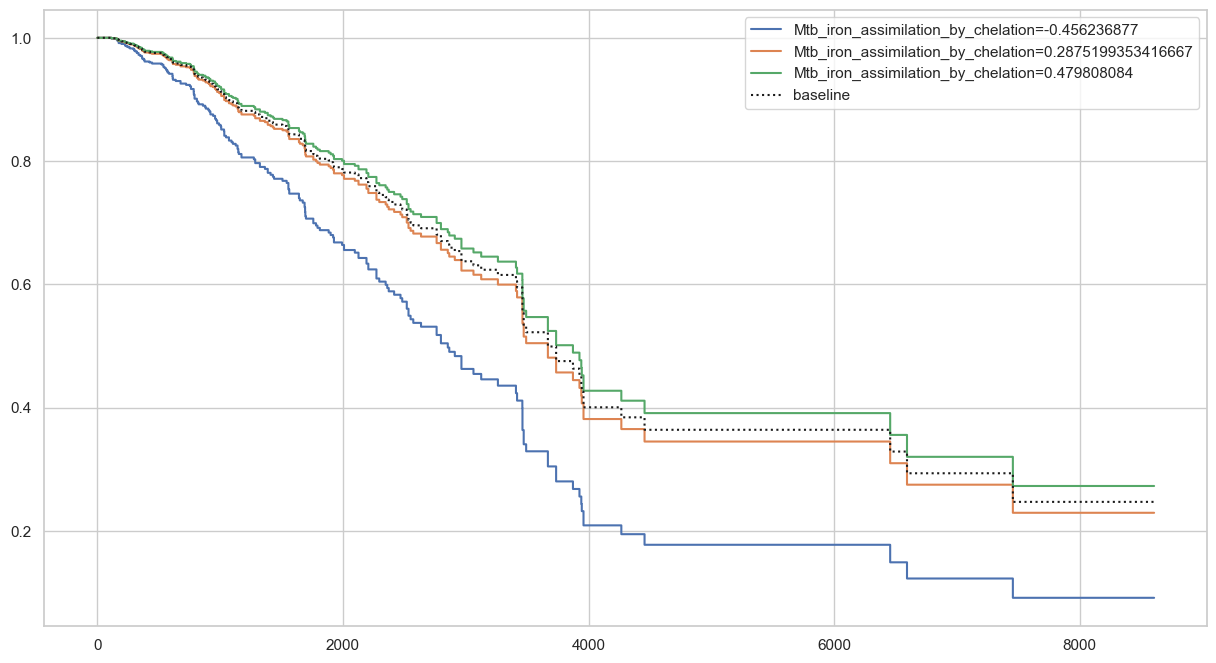

<lifelines.CoxPHFitter: fitted with 1200 total observations, 1003 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 1200
number of events observed = 197
   partial log-likelihood = -1132.91
         time fit was run = 2023-11-22 17:27:07 UTC

---
                              coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                           
Keratan_sulfate_degradation   0.86       2.37       0.57            -0.26             1.98                 0.77                 7.25

                              cmp to    z    p   -log2(p)
covariate                                                
Keratan_sulfate_degradation     0.00 1.51 0.13       2.93
---
Concordance = 0.51
Partial AIC = 2267.82
log-likelihood ratio test = 2.47 on 1 df
-log2(p) of ll-ratio test = 3.11

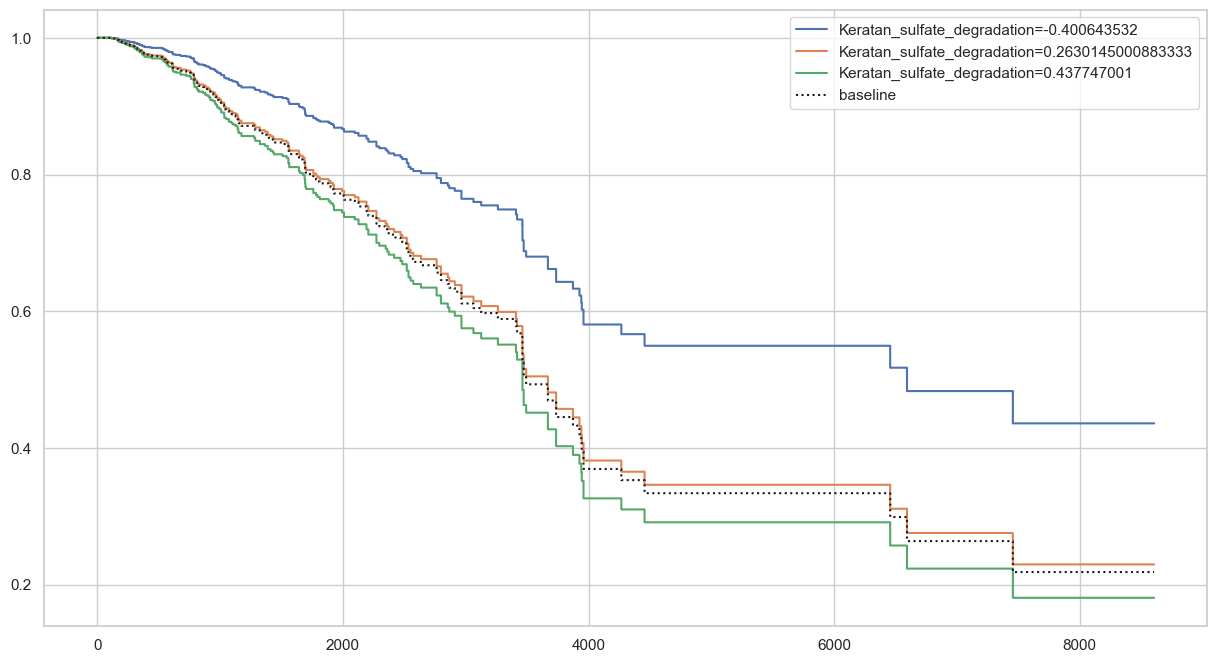

In [101]:
brca_data = df3[df3['cancer type abbreviation'] == 'BRCA']

brca_data.rename(columns={'OS_y': 'OS', 'OS.time_y': 'OS.time'}, inplace=True)


num_gene_sets = 3

# Find the top 3 upregulated and downregulated gene sets
mean_expression = gene_set_data.mean()
top_upregulated_gene_sets = mean_expression.nlargest(num_gene_sets).index
top_downregulated_gene_sets = mean_expression.nsmallest(num_gene_sets).index

for gene_set in top_upregulated_gene_sets:
    min_val = brca_data[gene_set].min()
    max_val = brca_data[gene_set].max()
    avg_val = brca_data[gene_set].mean()
    survival_columns = ['OS', 'OS.time', gene_set]
    survival_data = brca_data[survival_columns]
    survival_data = survival_data.dropna(subset=['OS', 'OS.time', gene_set])
    cph = CoxPHFitter()
    cph.fit(survival_data, duration_col='OS.time', event_col='OS' )
    cph.print_summary()
    fig, ax = plt.subplots(figsize=(15, 8))
    cph.plot_covariate_groups(gene_set, [min_val, avg_val, max_val], ax=ax)
    plt.show()



In [100]:
brca_data['Mtb_iron_assimilation_by_chelation']

16       0.374294
20       0.364697
43      -0.411713
44      -0.411713
52       0.307653
           ...   
11132    0.354019
11139    0.355670
11140   -0.366931
11157    0.307512
11162    0.408658
Name: Mtb_iron_assimilation_by_chelation, Length: 1200, dtype: float64

In [103]:
def get_worst_pathway(survival_data, top_upregulated, top_downregulated):

    for gene_set in top_upregulated:
        mask = survival_data[gene_set] > 0
        kmf.fit(durations=survival_data.loc[mask, 'OS.time'], event_observed=survival_data.loc[mask, 'OS'])
        closest_time_point = kmf.survival_function_.index.to_series().sub(median_survival_time).abs().idxmin()
        cumulative_hazard_at_median_time[gene_set] = 1.0 - kmf.survival_function_.loc[closest_time_point].iloc[0]

    # Group 3: Downregulated gene sets
    for gene_set in top_downregulated:
        mask = survival_data[gene_set] < 0
        kmf.fit(durations=survival_data.loc[mask, 'OS.time'], event_observed=survival_data.loc[mask, 'OS'])
        closest_time_point = kmf.survival_function_.index.to_series().sub(median_survival_time).abs().idxmin()
        cumulative_hazard_at_median_time[gene_set] = 1.0 - kmf.survival_function_.loc[closest_time_point].iloc[0]

    # Find the pathway with the highest cumulative hazard at the median survival time and return pathway, hazard
    worst_outcome_pathway = max(cumulative_hazard_at_median_time, key=cumulative_hazard_at_median_time.get)
    max_cumulative_hazard = cumulative_hazard_at_median_time[worst_outcome_pathway]

    return worst_outcome_pathway, max_cumulative_hazard


In [123]:
def get_graph(cancer_type, df3):
    gene_set_columns = df3.columns[1:1388]
    gene_set_data = df3[gene_set_columns]
    cancer_data = df3[df3['cancer type abbreviation'] == cancer_type]

    #rename columns OS_y to OS and OS.time_y to OS.time
    cancer_data.rename(columns={'OS_y': 'OS', 'OS.time_y': 'OS.time'}, inplace=True)

    survival_columns = ['bcr_patient_barcode', 'OS', 'OS.time']

    survival_data = cancer_data[survival_columns]

    survival_data = pd.concat([survival_data.reset_index(drop=True), gene_set_data.reset_index(drop=True)], axis=1)
    survival_data= survival_data.dropna()

    num_gene_sets = 3

    # Find the top 3 upregulated and downregulated gene sets
    mean_expression = gene_set_data.mean()
    top_upregulated_gene_sets = mean_expression.nlargest(num_gene_sets).index
    top_downregulated_gene_sets = mean_expression.nsmallest(num_gene_sets).index

    worst_pathway, cumulative_hazard = get_worst_pathway(survival_data, top_upregulated_gene_sets, top_downregulated_gene_sets)
    print("For {} cancer, the worst pathway is {} with cumulative hazard {}".format(cancer_type, worst_pathway, cumulative_hazard))

    #plot cox regression graph for this pathway
    min_val = cancer_data[worst_pathway].min()
    max_val = cancer_data[worst_pathway].max()
    avg_val = cancer_data[worst_pathway].mean()
    
    survival_columns = ['OS', 'OS.time', worst_pathway]
    survival_data = cancer_data[survival_columns]

    survival_data = survival_data.dropna(subset=['OS', 'OS.time', worst_pathway])
    cph = CoxPHFitter()
    cph.fit(survival_data, duration_col='OS.time', event_col='OS' )
    cph.print_summary()
    
    fig, ax = plt.subplots(figsize=(15, 8))
    cph.plot_covariate_groups(worst_pathway, [min_val, avg_val, max_val], ax=ax)
    plt.savefig(f'../plots/{cancer_type}_worst_pathway.png')


/var/folders/hf/qvknh29s1c74d6wxf9syrl3r0000gn/T/ipykernel_45989/3884757897.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancer_data.rename(columns={'OS_y': 'OS', 'OS.time_y': 'OS.time'}, inplace=True)


For BRCA cancer, the worst pathway is Molybdenum_cofactor_biosynthesis with cumulative hazard 0.08755685426932658


<lifelines.CoxPHFitter: fitted with 1200 total observations, 1003 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 1200
number of events observed = 197
   partial log-likelihood = -1133.44
         time fit was run = 2023-11-23 15:20:51 UTC

---
                                   coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                
Molybdenum_cofactor_biosynthesis  -0.26       0.77       0.22            -0.68             0.17                 0.50                 1.19

                                   cmp to     z    p   -log2(p)
covariate                                                      
Molybdenum_cofactor_biosynthesis     0.00 -1.18 0.24       2.07
---
Concordance = 0.59
Partial AIC = 2268.88
log-likelihood ratio test = 1.41 on 1 df
-log2(p) of ll-ratio test = 2.09

For GBM cancer, the worst pathway is Molybdenum_cofactor_biosynthesis with cumulative hazard 0.9196226901047067


/var/folders/hf/qvknh29s1c74d6wxf9syrl3r0000gn/T/ipykernel_45989/3884757897.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancer_data.rename(columns={'OS_y': 'OS', 'OS.time_y': 'OS.time'}, inplace=True)


<lifelines.CoxPHFitter: fitted with 153 total observations, 31 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 153
number of events observed = 122
   partial log-likelihood = -489.44
         time fit was run = 2023-11-23 15:20:52 UTC

---
                                   coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                
Molybdenum_cofactor_biosynthesis  -0.31       0.73       0.32            -0.94             0.32                 0.39                 1.38

                                   cmp to     z    p   -log2(p)
covariate                                                      
Molybdenum_cofactor_biosynthesis     0.00 -0.96 0.34       1.58
---
Concordance = 0.53
Partial AIC = 980.88
log-likelihood ratio test = 0.90 on 1 df
-log2(p) of ll-ratio test = 1.54

For OV cancer, the worst pathway is Catecholamine_biosynthesis with cumulative hazard 0.2958275471609223


/var/folders/hf/qvknh29s1c74d6wxf9syrl3r0000gn/T/ipykernel_45989/3884757897.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancer_data.rename(columns={'OS_y': 'OS', 'OS.time_y': 'OS.time'}, inplace=True)


<lifelines.CoxPHFitter: fitted with 256 total observations, 105 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 256
number of events observed = 151
   partial log-likelihood = -685.87
         time fit was run = 2023-11-23 15:20:52 UTC

---
                             coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                          
Catecholamine_biosynthesis   0.64       1.90       0.25             0.15             1.13                 1.16                 3.09

                             cmp to    z    p   -log2(p)
covariate                                               
Catecholamine_biosynthesis     0.00 2.57 0.01       6.63
---
Concordance = 0.55
Partial AIC = 1373.73
log-likelihood ratio test = 6.53 on 1 df
-log2(p) of ll-ratio test = 6.56

For UCEC cancer, the worst pathway is Molybdenum_cofactor_biosynthesis with cumulative hazard 0.13398341354337495


/var/folders/hf/qvknh29s1c74d6wxf9syrl3r0000gn/T/ipykernel_45989/3884757897.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancer_data.rename(columns={'OS_y': 'OS', 'OS.time_y': 'OS.time'}, inplace=True)


<lifelines.CoxPHFitter: fitted with 555 total observations, 461 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 555
number of events observed = 94
   partial log-likelihood = -526.35
         time fit was run = 2023-11-23 15:20:52 UTC

---
                                   coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                
Molybdenum_cofactor_biosynthesis  -0.10       0.90       0.37            -0.82             0.62                 0.44                 1.85

                                   cmp to     z    p   -log2(p)
covariate                                                      
Molybdenum_cofactor_biosynthesis     0.00 -0.28 0.78       0.35
---
Concordance = 0.53
Partial AIC = 1054.70
log-likelihood ratio test = 0.08 on 1 df
-log2(p) of ll-ratio test = 0.35

For KIRC cancer, the worst pathway is p53-Independent_DNA_Damage_Response with cumulative hazard 0.2529581509170491


/var/folders/hf/qvknh29s1c74d6wxf9syrl3r0000gn/T/ipykernel_45989/3884757897.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancer_data.rename(columns={'OS_y': 'OS', 'OS.time_y': 'OS.time'}, inplace=True)


<lifelines.CoxPHFitter: fitted with 894 total observations, 572 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 894
number of events observed = 322
   partial log-likelihood = -1983.93
         time fit was run = 2023-11-23 15:20:52 UTC

---
                                      coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                   
p53-Independent_DNA_Damage_Response   1.62       5.05       0.41             0.82             2.41                 2.28                11.18

                                      cmp to    z      p   -log2(p)
covariate                                                          
p53-Independent_DNA_Damage_Response     0.00 3.99 <0.005      13.89
---
Concordance = 0.48
Partial AIC = 3969.87
log-likelihood ratio test = 12.18 on 1 df
-log2(p) of ll-ratio test = 11.02

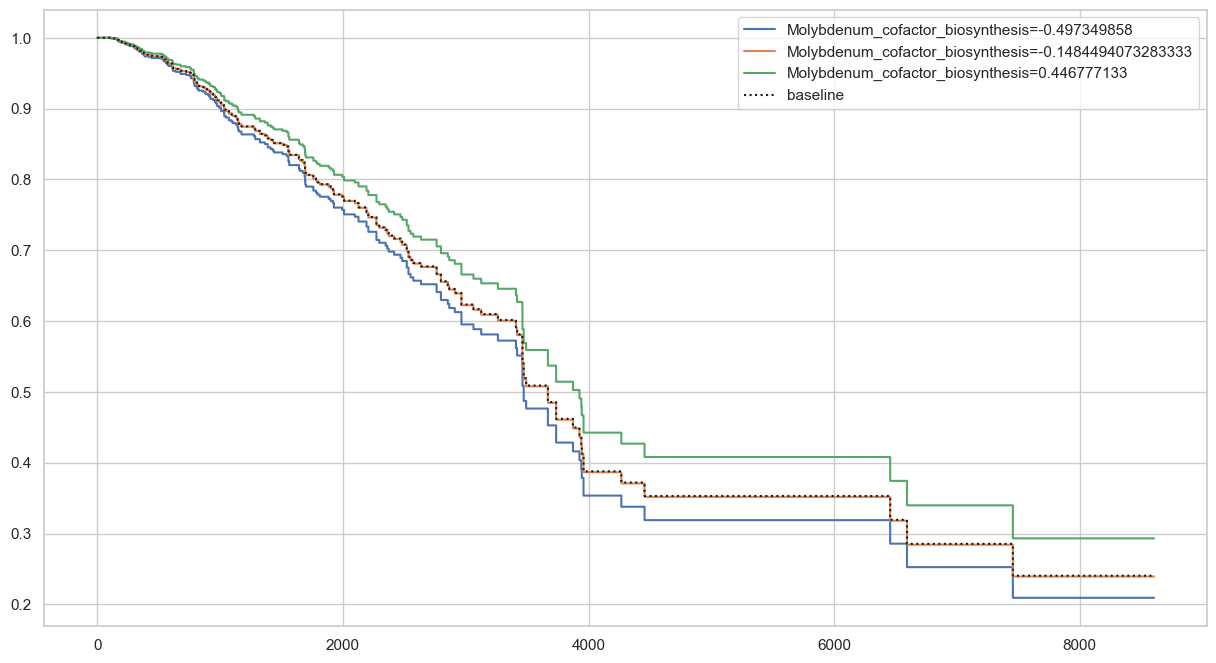

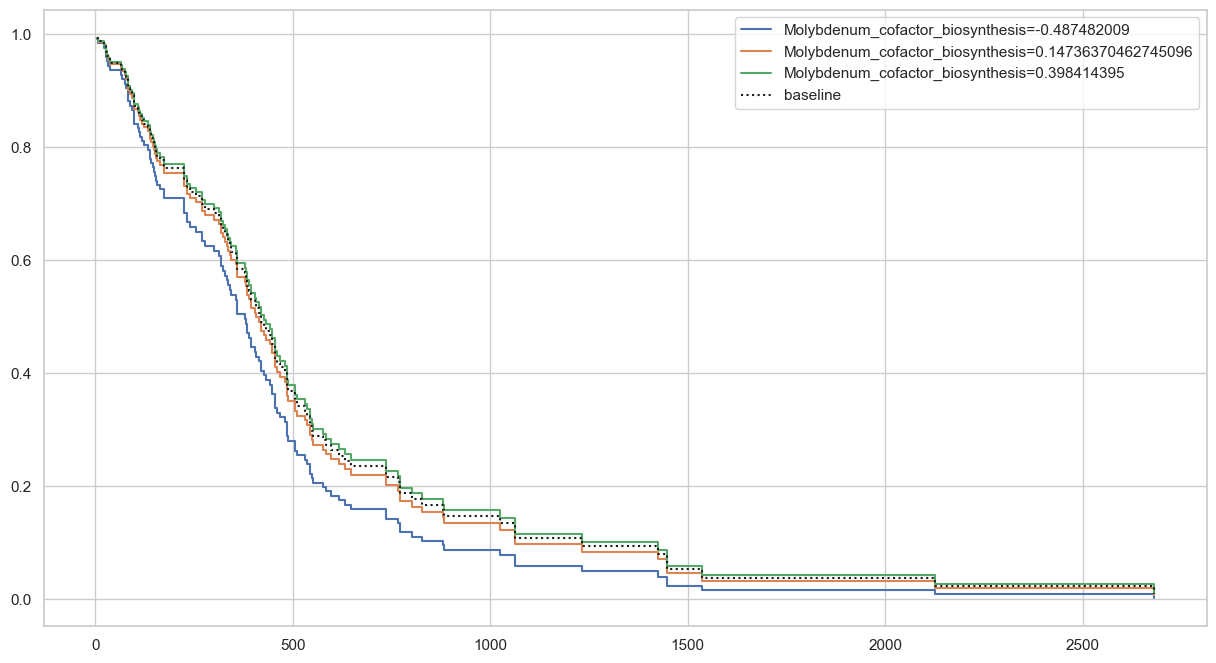

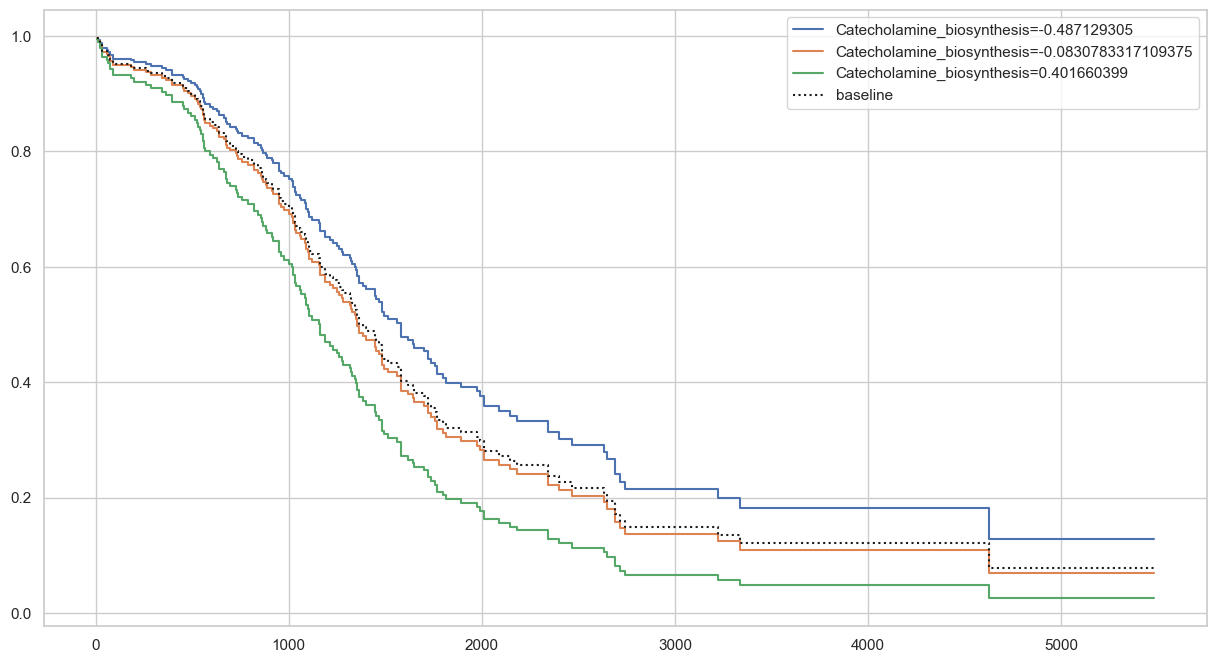

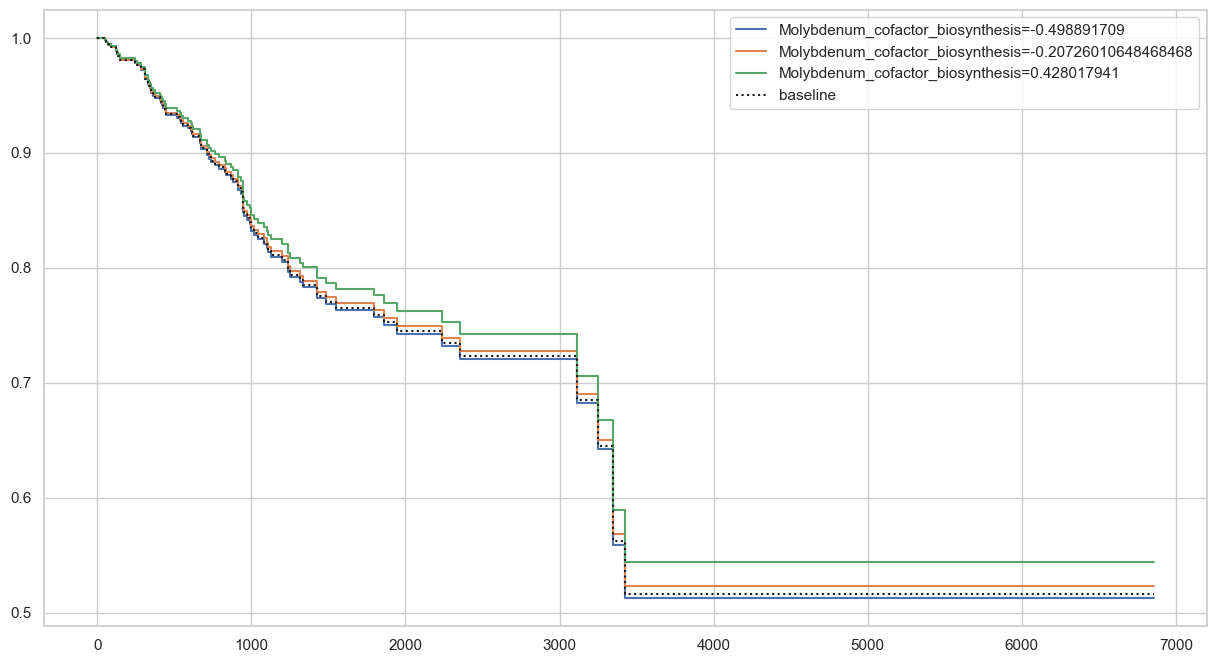

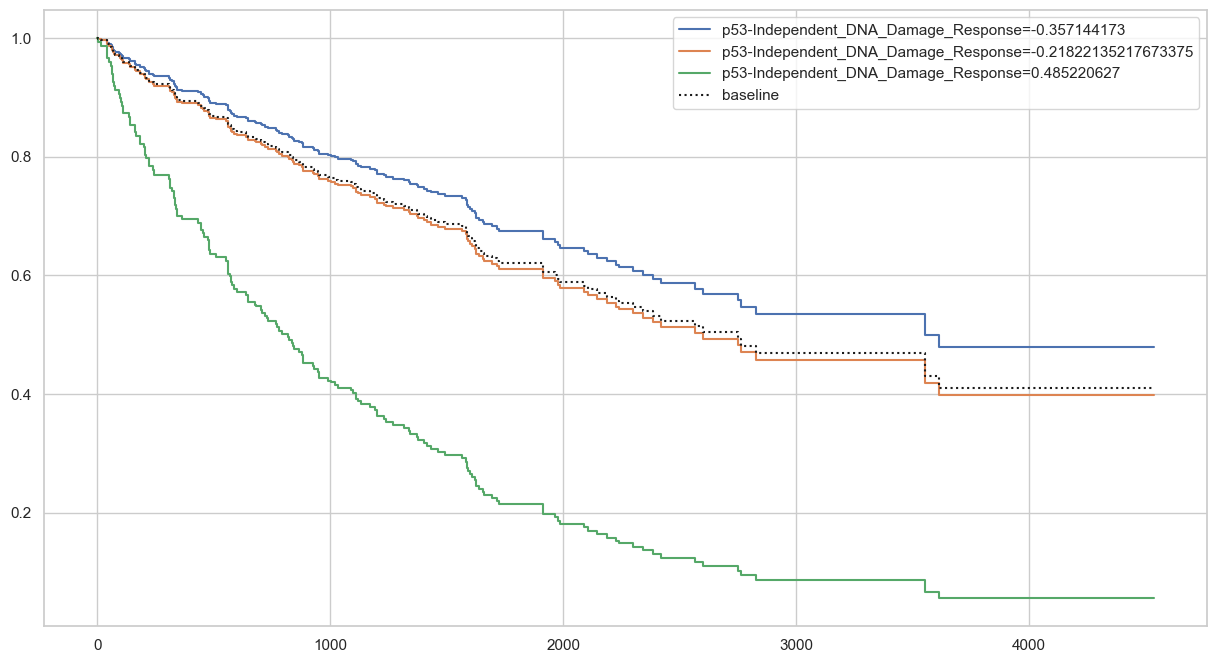

In [124]:
#do it for BRCA
cancer_abbreviations = ['BRCA', 'GBM', 'OV', 'UCEC', 'KIRC']

for cancer_type in cancer_abbreviations:
    get_graph(cancer_type, df3)

In [107]:
print(df3['cancer type abbreviation'].unique())

['GBM' 'LUSC' 'LGG' 'SKCM' 'STAD' 'KIRC' 'TGCT' 'HNSC' 'LUAD' 'BRCA'
 'LAML' 'UCEC' 'KIRP' 'BLCA' 'PAAD' 'KICH' 'CESC' 'PRAD' 'ACC' 'COAD'
 'MESO' 'LIHC' 'ESCA' 'PCPG' 'SARC' 'OV' 'READ' 'THCA' 'UVM' 'THYM' 'DLBC'
 'UCS' 'CHOL']
